File exists: True


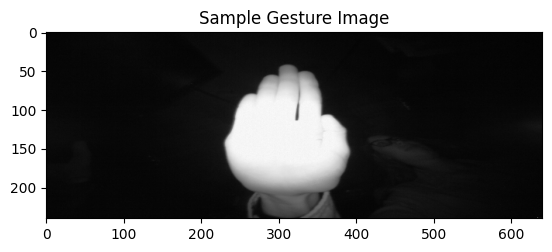

In [1]:
import os
import cv2
import matplotlib.pyplot as plt

img_path = 'C:/Users/Admin/Downloads/archive/leapGestRecog/00/01_palm/frame_00_01_0168.png'

print("File exists:", os.path.isfile(img_path))

img = cv2.imread(img_path)
if img is None:
    print("❌ Unable to load image. Check file path or file format.")
else:
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Sample Gesture Image")
    plt.show()


In [4]:
import os
import cv2
import numpy as np

IMG_SIZE = 64

def load_dataset(base_path):
    images = []
    labels = []
    
    for gesture_folder in os.listdir(base_path):
        gesture_path = os.path.join(base_path, gesture_folder)
        if os.path.isdir(gesture_path):
            for gesture_type in os.listdir(gesture_path):
                gesture_type_path = os.path.join(gesture_path, gesture_type)
                if os.path.isdir(gesture_type_path):
                    for img_file in os.listdir(gesture_type_path):
                        img_path = os.path.join(gesture_type_path, img_file)
                        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                        if img is None:
                            continue  # skip bad images
                        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                        images.append(img)
                        labels.append(int(gesture_folder))
                        
                        if len(images) % 1000 == 0:
                            print(f"Loaded {len(images)} images so far...")
    
    print(f"✅ Finished loading {len(images)} images.")
    return np.array(images), np.array(labels)

# Call the function
X, y = load_dataset('C:/Users/Admin/Downloads/archive/leapGestRecog')

# Reshape and normalize
X = X / 255.0
X = X.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

print("Dataset shape:", X.shape, y.shape)



Loaded 1000 images so far...
Loaded 2000 images so far...
Loaded 3000 images so far...
Loaded 4000 images so far...
Loaded 5000 images so far...
Loaded 6000 images so far...
Loaded 7000 images so far...
Loaded 8000 images so far...
Loaded 9000 images so far...
Loaded 10000 images so far...
Loaded 11000 images so far...
Loaded 12000 images so far...
Loaded 13000 images so far...
Loaded 14000 images so far...
Loaded 15000 images so far...
Loaded 16000 images so far...
Loaded 17000 images so far...
Loaded 18000 images so far...
Loaded 19000 images so far...
Loaded 20000 images so far...
✅ Finished loading 20000 images.
Dataset shape: (20000, 64, 64, 1) (20000,)


In [5]:
from sklearn.model_selection import train_test_split

# Split into train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (16000, 64, 64, 1) (16000,)
Test shape: (4000, 64, 64, 1) (4000,)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 gesture classes (00 to 09)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,625,866 (6.20 MB)

 Trainable params: 1,625,866 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 52s 98ms/step - accuracy: 0.6484 - loss: 0.9940 - val_accuracy: 0.9898 - val_loss: 0.0234
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 46s 93ms/step - accuracy: 0.9779 - loss: 0.0632 - val_accuracy: 0.9905 - val_loss: 0.0159
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 49s 97ms/step - accuracy: 0.9841 - loss: 0.0349 - val_accuracy: 0.9920 - val_loss: 0.0149
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 51s 101ms/step - accuracy: 0.9850 - loss: 0.0337 - val_accuracy: 0.9890 - val_loss: 0.0163
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 49s 97ms/step - accuracy: 0.9864 - loss: 0.0277 - val_accuracy: 0.9918 - val_loss: 0.0138
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 50s 99ms/step - accuracy: 0.9853 - loss: 0.0313 - val_accuracy: 0.9925 - val_loss: 0.0126
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 49s 98ms/step - accuracy: 0.9887 - loss: 0.0237 - val_accuracy: 0.9935 - val_loss: 0.0132
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 49s 98ms/step - accuracy: 0.9916 - loss: 0.0196 -

In [8]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"✅ Test accuracy: {test_acc:.4f}")
print(f"✅ Test loss: {test_loss:.4f}")


125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9925 - loss: 0.0132
✅ Test accuracy: 0.9920
✅ Test loss: 0.0160


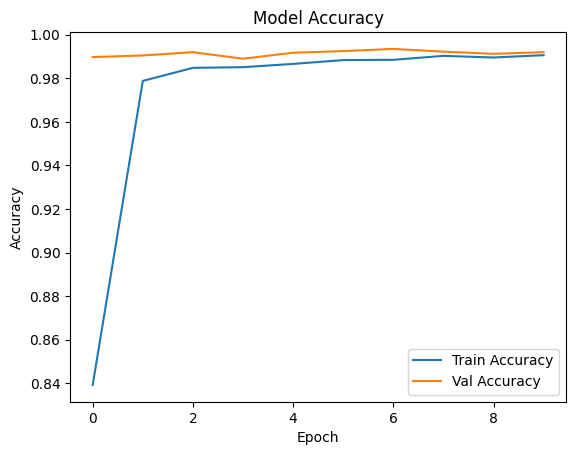

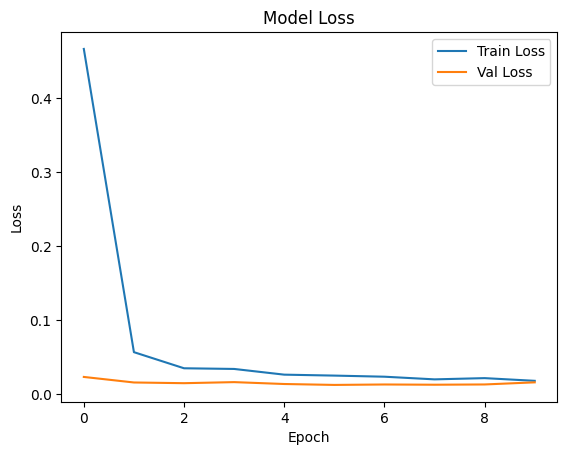

In [9]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
✅ Predicted: 2, Actual: 2


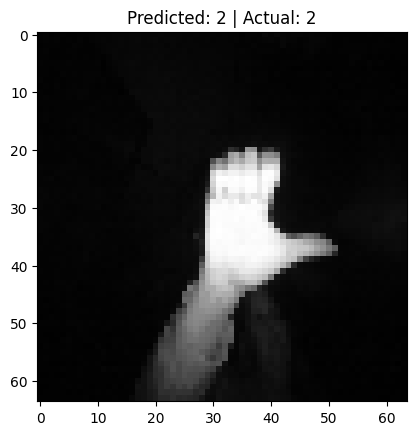

In [10]:
import numpy as np

idx = np.random.randint(len(X_test))
sample = X_test[idx].reshape(1, 64, 64, 1)
prediction = model.predict(sample)
predicted_class = np.argmax(prediction)

print(f"✅ Predicted: {predicted_class}, Actual: {y_test[idx]}")
plt.imshow(X_test[idx].reshape(64,64), cmap='gray')
plt.title(f"Predicted: {predicted_class} | Actual: {y_test[idx]}")
plt.show()


In [11]:
model.save("hand_gesture_model.h5")
print("✅ Model saved as hand_gesture_model.h5")


✅ Model saved as hand_gesture_model.h5


In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {test_acc:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")


125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9925 - loss: 0.0132
✅ Test Accuracy: 0.9920
✅ Test Loss: 0.0160


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


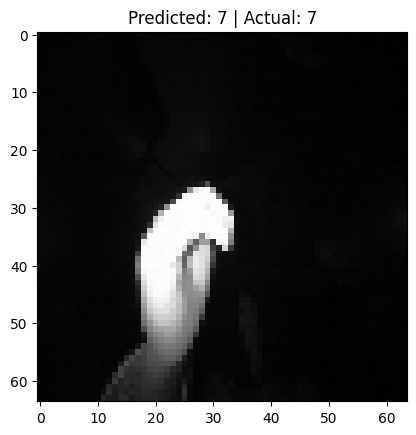

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Pick a random test image
idx = np.random.randint(len(X_test))
sample = X_test[idx].reshape(1, 64, 64, 1)

# Make prediction
pred = model.predict(sample)
pred_class = np.argmax(pred)

# Show image + prediction
plt.imshow(X_test[idx].reshape(64,64), cmap='gray')
plt.title(f"Predicted: {pred_class} | Actual: {y_test[idx]}")
plt.show()


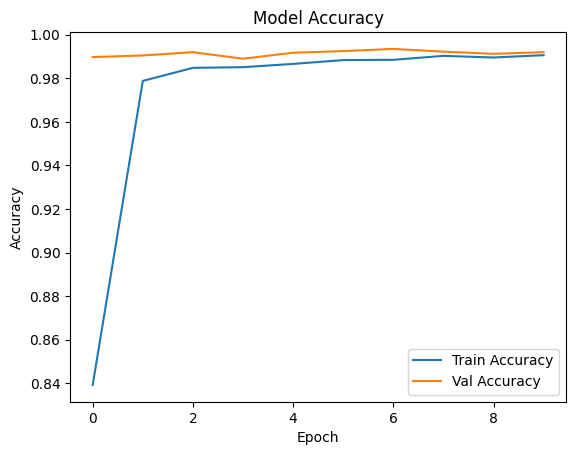

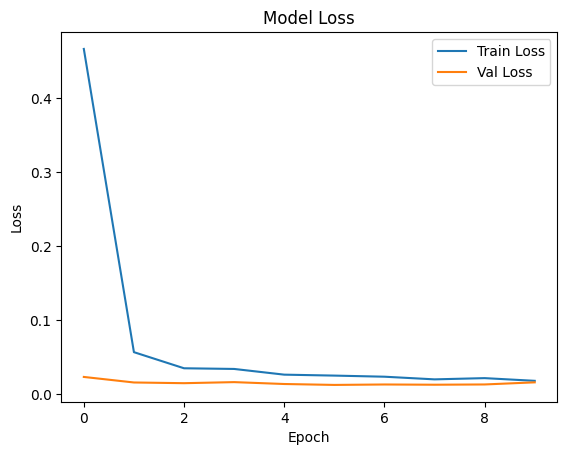

In [14]:
import matplotlib.pyplot as plt

# Accuracy graph
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Loss graph
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()
